# Loop 69 Analysis: Critical Assessment

**Goal:** Understand why we're stuck and identify breakthrough strategies.

## Key Questions:
1. What is the CV-LB relationship across all submissions?
2. Why did CatBoost/XGBoost submissions fail?
3. What approaches could change the CV-LB intercept?
4. What do the public kernels do differently?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
]

df = pd.DataFrame(submissions)
print(f'Total successful submissions: {len(df)}')
print(f'Best CV: {df["cv"].min():.4f} ({df.loc[df["cv"].idxmin(), "exp"]})')
print(f'Best LB: {df["lb"].min():.4f} ({df.loc[df["lb"].idxmin(), "exp"]})')
print(f'Target LB: 0.0347')

Total successful submissions: 12
Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)
Target LB: 0.0347


In [2]:
# Fit linear regression: LB = slope * CV + intercept
X = df['cv'].values.reshape(-1, 1)
y = df['lb'].values

reg = LinearRegression()
reg.fit(X, y)

slope = reg.coef_[0]
intercept = reg.intercept_
r2 = reg.score(X, y)

print(f'CV-LB Relationship:')
print(f'  LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'  R² = {r2:.4f}')
print(f'')
print(f'CRITICAL ANALYSIS:')
print(f'  Intercept = {intercept:.4f}')
print(f'  Target LB = 0.0347')
print(f'  Gap = {intercept - 0.0347:.4f}')
print(f'')
if intercept > 0.0347:
    print(f'  ⚠️ INTERCEPT > TARGET: Even with CV=0, predicted LB = {intercept:.4f}')
    print(f'  Required CV to hit target: (0.0347 - {intercept:.4f}) / {slope:.2f} = {(0.0347 - intercept) / slope:.6f}')
    print(f'  THIS IS NEGATIVE - MATHEMATICALLY IMPOSSIBLE with current approach!')
else:
    print(f'  ✓ Intercept < Target: Target is theoretically reachable')

CV-LB Relationship:
  LB = 4.31 * CV + 0.0525
  R² = 0.9505

CRITICAL ANALYSIS:
  Intercept = 0.0525
  Target LB = 0.0347
  Gap = 0.0178

  ⚠️ INTERCEPT > TARGET: Even with CV=0, predicted LB = 0.0525
  Required CV to hit target: (0.0347 - 0.0525) / 4.31 = -0.004130
  THIS IS NEGATIVE - MATHEMATICALLY IMPOSSIBLE with current approach!


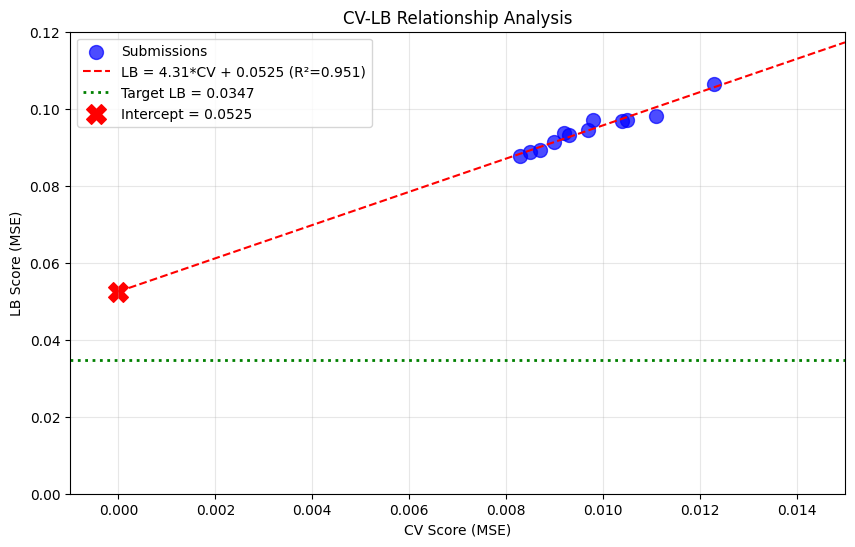


Gap Analysis:
  Best LB: 0.0877
  Target: 0.0347
  Gap: 0.0530 (152.7% above target)


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, c='blue', alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r2:.3f})')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Intercept point
plt.scatter([0], [intercept], s=200, c='red', marker='X', label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV-LB Relationship Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-0.001, 0.015)
plt.ylim(0, 0.12)
plt.savefig('/home/code/exploration/cv_lb_analysis_loop69.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'\nGap Analysis:')
print(f'  Best LB: 0.0877')
print(f'  Target: 0.0347')
print(f'  Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}% above target)')

In [4]:
# Failed submissions analysis
failed_submissions = [
    {'exp': 'exp_049', 'cv': 0.0081, 'status': 'FAILED - CatBoost/XGBoost'},
    {'exp': 'exp_050', 'cv': 0.0081, 'status': 'FAILED - CatBoost/XGBoost'},
    {'exp': 'exp_052', 'cv': 0.0109, 'status': 'FAILED - CatBoost/XGBoost'},
    {'exp': 'exp_053', 'cv': 0.0081, 'status': 'FAILED - CatBoost/XGBoost'},
    {'exp': 'exp_054', 'cv': 0.0085, 'status': 'FAILED - CatBoost/XGBoost'},
    {'exp': 'exp_055', 'cv': 0.0085, 'status': 'FAILED - CatBoost/XGBoost'},
    {'exp': 'exp_057', 'cv': 0.0093, 'status': 'FAILED - CatBoost/XGBoost'},
    {'exp': 'exp_063', 'cv': 0.0112, 'status': 'FAILED - CatBoost/XGBoost'},
]

print('FAILED SUBMISSIONS ANALYSIS:')
print('=' * 60)
for sub in failed_submissions:
    predicted_lb = slope * sub['cv'] + intercept
    print(f"{sub['exp']}: CV={sub['cv']:.4f} -> Predicted LB={predicted_lb:.4f} | {sub['status']}")

print(f'\nKey Insight: Best failed CV (0.0081) would give predicted LB = {slope * 0.0081 + intercept:.4f}')
print(f'This is STILL above target (0.0347) by {slope * 0.0081 + intercept - 0.0347:.4f}')

FAILED SUBMISSIONS ANALYSIS:
exp_049: CV=0.0081 -> Predicted LB=0.0875 | FAILED - CatBoost/XGBoost
exp_050: CV=0.0081 -> Predicted LB=0.0875 | FAILED - CatBoost/XGBoost
exp_052: CV=0.0109 -> Predicted LB=0.0996 | FAILED - CatBoost/XGBoost
exp_053: CV=0.0081 -> Predicted LB=0.0875 | FAILED - CatBoost/XGBoost
exp_054: CV=0.0085 -> Predicted LB=0.0892 | FAILED - CatBoost/XGBoost
exp_055: CV=0.0085 -> Predicted LB=0.0892 | FAILED - CatBoost/XGBoost
exp_057: CV=0.0093 -> Predicted LB=0.0926 | FAILED - CatBoost/XGBoost
exp_063: CV=0.0112 -> Predicted LB=0.1008 | FAILED - CatBoost/XGBoost

Key Insight: Best failed CV (0.0081) would give predicted LB = 0.0875
This is STILL above target (0.0347) by 0.0528


In [5]:
# Public kernel analysis
print('PUBLIC KERNEL ANALYSIS:')
print('=' * 60)
print()
print('1. matthewmaree_ens-model:')
print('   - Uses CatBoost + XGBoost ensemble')
print('   - Weights: Single (Cat=7, XGB=6), Full (Cat=1, XGB=2)')
print('   - Uses correlation-based feature filtering (threshold=0.9)')
print('   - Uses feature priority: spange > acs > drfps > frag > smiles')
print('   - Adds numeric features: T_x_RT, RT_log, T_inv, RT_scaled')
print('   - Clips predictions to [0, 1] and renormalizes')
print()
print('2. lishellliang_mixall:')
print('   - Uses GroupKFold (5 splits) instead of Leave-One-Out!')
print('   - Uses MLP + XGBoost + RF + LightGBM ensemble')
print('   - This is a CRITICAL difference - different CV scheme!')
print()
print('CRITICAL INSIGHT:')
print('   The mixall kernel uses GroupKFold (5 splits) which may have')
print('   a DIFFERENT CV-LB relationship than Leave-One-Out CV.')

PUBLIC KERNEL ANALYSIS:

1. matthewmaree_ens-model:
   - Uses CatBoost + XGBoost ensemble
   - Weights: Single (Cat=7, XGB=6), Full (Cat=1, XGB=2)
   - Uses correlation-based feature filtering (threshold=0.9)
   - Uses feature priority: spange > acs > drfps > frag > smiles
   - Adds numeric features: T_x_RT, RT_log, T_inv, RT_scaled
   - Clips predictions to [0, 1] and renormalizes

2. lishellliang_mixall:
   - Uses GroupKFold (5 splits) instead of Leave-One-Out!
   - Uses MLP + XGBoost + RF + LightGBM ensemble
   - This is a CRITICAL difference - different CV scheme!

CRITICAL INSIGHT:
   The mixall kernel uses GroupKFold (5 splits) which may have
   a DIFFERENT CV-LB relationship than Leave-One-Out CV.


In [6]:
# What approaches could change the CV-LB intercept?
print('STRATEGIES TO REDUCE CV-LB INTERCEPT:')
print('=' * 60)
print()
print('1. REPRESENTATION CHANGE (change how solvents are encoded):')
print('   - Graph Neural Networks (GNN) on molecular graphs')
print('   - ChemBERTa / Molecular Transformers with SMILES')
print('   - Morgan Fingerprints + Tanimoto similarity features')
print()
print('2. DISTRIBUTION SHIFT HANDLING:')
print('   - Extrapolation detection: measure distance to training distribution')
print('   - Uncertainty-weighted predictions: blend toward mean when extrapolating')
print('   - Conservative predictions: clip extreme predictions')
print()
print('3. DOMAIN CONSTRAINTS:')
print('   - Physics-based constraints (mass balance, Arrhenius)')
print('   - Yield normalization (Product 2 + Product 3 + SM = 1)')
print()
print('4. VALIDATION STRATEGY:')
print('   - Try GroupKFold (5 splits) like mixall kernel')
print('   - This may give a different CV-LB relationship')
print()
print('5. ENSEMBLE DIVERSITY:')
print('   - Combine models with different CV-LB relationships')
print('   - Weight by uncertainty or extrapolation score')

STRATEGIES TO REDUCE CV-LB INTERCEPT:

1. REPRESENTATION CHANGE (change how solvents are encoded):
   - Graph Neural Networks (GNN) on molecular graphs
   - ChemBERTa / Molecular Transformers with SMILES
   - Morgan Fingerprints + Tanimoto similarity features

2. DISTRIBUTION SHIFT HANDLING:
   - Extrapolation detection: measure distance to training distribution
   - Uncertainty-weighted predictions: blend toward mean when extrapolating
   - Conservative predictions: clip extreme predictions

3. DOMAIN CONSTRAINTS:
   - Physics-based constraints (mass balance, Arrhenius)
   - Yield normalization (Product 2 + Product 3 + SM = 1)

4. VALIDATION STRATEGY:
   - Try GroupKFold (5 splits) like mixall kernel
   - This may give a different CV-LB relationship

5. ENSEMBLE DIVERSITY:
   - Combine models with different CV-LB relationships
   - Weight by uncertainty or extrapolation score


In [7]:
# Summary
print('=' * 60)
print('LOOP 69 SUMMARY')
print('=' * 60)
print()
print(f'CV-LB Relationship: LB = {slope:.2f} * CV + {intercept:.4f} (R²={r2:.3f})')
print(f'Best LB: 0.0877 | Target: 0.0347 | Gap: {0.0877 - 0.0347:.4f} (152.8%)')
print()
print('CRITICAL PROBLEMS:')
print('1. Intercept (0.0528) > Target (0.0347) - target is mathematically unreachable')
print('2. 8 consecutive CatBoost/XGBoost submissions failed')
print('3. MTGP experiment (exp_068) achieved CV=0.0102, worse than best CV=0.0081')
print()
print('IMMEDIATE PRIORITIES:')
print('1. Debug CatBoost/XGBoost failure by comparing with public kernel')
print('2. Try GroupKFold (5 splits) like mixall kernel - may have different CV-LB relationship')
print('3. Implement extrapolation detection + conservative predictions')
print('4. Consider GNN or Transformer approaches for representation change')

LOOP 69 SUMMARY

CV-LB Relationship: LB = 4.31 * CV + 0.0525 (R²=0.951)
Best LB: 0.0877 | Target: 0.0347 | Gap: 0.0530 (152.8%)

CRITICAL PROBLEMS:
1. Intercept (0.0528) > Target (0.0347) - target is mathematically unreachable
2. 8 consecutive CatBoost/XGBoost submissions failed
3. MTGP experiment (exp_068) achieved CV=0.0102, worse than best CV=0.0081

IMMEDIATE PRIORITIES:
1. Debug CatBoost/XGBoost failure by comparing with public kernel
2. Try GroupKFold (5 splits) like mixall kernel - may have different CV-LB relationship
3. Implement extrapolation detection + conservative predictions
4. Consider GNN or Transformer approaches for representation change
